In [1]:
import pandas as pd
import numpy as np
import ot
import os
from CoordAlignment import CoordAlignment
R_dirs="/home/tguo/tguo2/miniconda3/envs/stnet/lib/R"

In [6]:
dirs="/data02/tguo/space_batch_effect/Hippo/"
samples=["10X_Normal","10X_DAPI","10X_FFPE"]
clust_cate='louvain'
meta_file=[]
coord_file=[]
flags=""
for i in np.arange(len(samples)):
    meta_file.append(dirs+"gtt_input/"+samples[i]+"_meta.csv")
    coord_file.append(dirs+"gtt_input/"+samples[i]+"_coord.csv")
    flags=flags+"_"+samples[i]
embed_file=dirs+"gtt_output/AGC_embed"+flags+"_xent.csv"
cluster_file=dirs+'metrics/'+clust_cate+'_clust'+flags+'.csv'
input_file=[meta_file,coord_file,embed_file,cluster_file]
output_dirs=dirs+"gtt_output/coordinate_file/"
ub=["10X_Normal","10X_DAPI","10X_FFPE"]

In [14]:
# dirs="/data02/tguo/space_batch_effect/mouse_brain/"
# samples=["anterior1","anterior2"]

# clust_cate='louvain'
# meta_file=[]
# coord_file=[]
# flags=""
# for i in np.arange(len(samples)):
#     meta_file.append(dirs+"gtt_input/"+samples[i]+"_meta.csv")
#     coord_file.append(dirs+"gtt_input/"+samples[i]+"_coord.csv")
#     flags=flags+"_"+samples[i]
# embed_file=dirs+"gtt_output/AGC_embed"+flags+"_xent.csv"
# cluster_file=dirs+'metrics/'+clust_cate+'_clust'+flags+'.csv'
# input_file=[meta_file,coord_file,embed_file,cluster_file]
# output_dirs=dirs+"gtt_output/coordinate_file/"
# ub=["anterior1","anterior2"]

In [18]:
# dirs="/data02/tguo/space_batch_effect/mouse_OB/"
# samples=["BGI","SlideV2"]
# clust_cate='louvain'
# meta_file=[]
# coord_file=[]
# flags=""
# for i in np.arange(len(samples)):
#     meta_file.append(dirs+"gtt_input/"+samples[i]+"_meta.csv")
#     coord_file.append(dirs+"gtt_input/"+samples[i]+"_coord.csv")
#     flags=flags+"_"+samples[i]
# embed_file=dirs+"gtt_output/AGC_embed"+flags+"_xent.csv"
# cluster_file=dirs+'metrics/'+clust_cate+'_clust'+flags+'.csv'
# input_file=[meta_file,coord_file,embed_file,cluster_file]
# output_dirs=dirs+"gtt_output/coordinate_file/"
# ub=["BGI","SlideV2"]

In [38]:
# dirs="/data02/tguo/space_batch_effect/human_DLPFC_10x/"
# samples=np.array(['151507','151508','151509','151510','151669','151670','151671','151672','151673','151674','151675','151676'])
# samples=samples[8:12]
# meta_file=[]
# coord_file=[]
# flags=""
# flags1=samples[0]
# for i in np.arange(1,len(samples)):
#         flags1=flags1+"-"+samples[i]
# flags1=flags1+"_"
# for i in np.arange(len(samples)):
#     meta_file.append(dirs+"gtt_input_scanpy/"+flags1+samples[i]+"_label.txt")
#     coord_file.append(dirs+"gtt_input_scanpy/"+flags1+samples[i]+"_positions.txt")
#     flags=flags+"_"+samples[i]
# embed_file=dirs+"gtt_output/AGC_embed"+flags+"_xent.csv"
# cluster_file=dirs+'metrics/'+clust_cate+'_clust'+flags+'.csv'
# input_file=[meta_file,coord_file,embed_file,cluster_file]
# output_dirs=dirs+"gtt_output/coordinate_file/"
# ub=[151673,151674,151675,151676]

In [2]:
dirs="/data02/tguo/space_batch_effect/simulate/"
batch="_1_2"
types="_3batch_types5"
flags=batch+types
clust_cate='louvain'
meta_file=[]
coord_file=[]
samples=['1','2','3']
for i in np.arange(len(samples)):
    meta_file.append(dirs+"gtt_input/meta"+samples[i]+flags+".csv")
    coord_file.append(dirs+"gtt_input/coord"+samples[i]+flags+".csv")
embed_file=dirs+"gtt_output/AGC_embed"+flags+"_xent.csv"
cluster_file=dirs+'metrics/'+clust_cate+'_clust'+flags+'.csv'
input_file=[meta_file,coord_file,embed_file,cluster_file]
output_dirs=dirs+"gtt_output/coordinate_file/"
ub=['Batch1','Batch2','Batch3']

In [3]:
alpha=0.5
types="weighted_mean"
CA=CoordAlignment(input_file=input_file,output_dirs=output_dirs,ub=ub,flags=flags,clust_cate=clust_cate,R_dirs=R_dirs,alpha=alpha,types=types)
New_Coord=CA.New_Coord

/home/tguo/tguo2/miniconda3/envs/stnet/lib/python3.6/site-packages/pandas/core/indexing.py:1758: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/home/tguo/tguo2/miniconda3/envs/stnet/lib/python3.6/site-packages/pandas/core/indexing.py:1758: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/home/tguo/tguo2/miniconda3/envs/stnet/lib/python3.6/site-packages/pandas/core/indexing.py:1758: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [4]:
New_Coord1=New_Coord.values
celltype=New_Coord1[:,3]
ul=np.unique(celltype)
# Coord1=Coord.values
# celltype=Coord1[:,3]
# ul=np.unique(celltype)

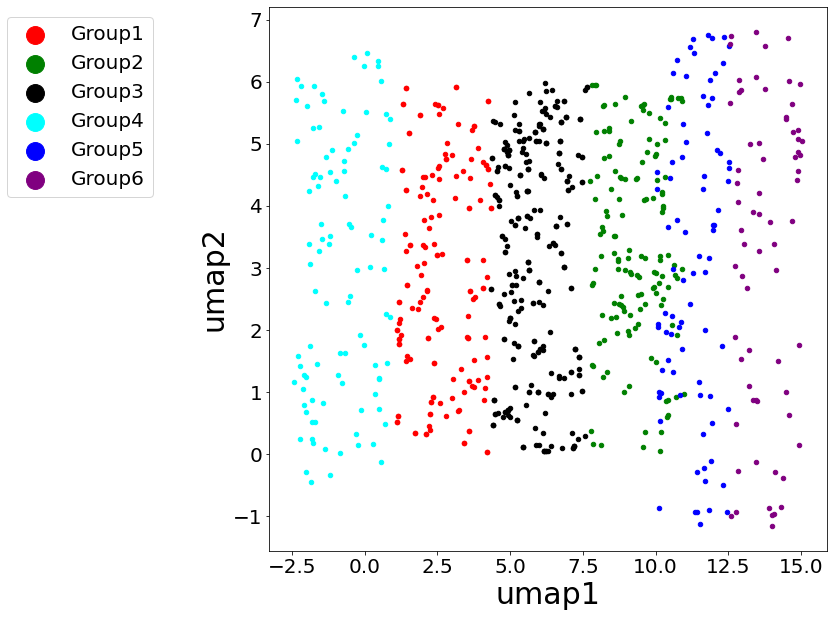

In [6]:
import matplotlib.pyplot as plt
colour2=['r','g','black','cyan','blue','purple','yellow','grey']
colour1=['lightcoral','red','tomato','chocolate','darkorange','gold','olive','yellow','yellowgreen','lawngreen','forestgreen','lime',
       'cyan','deepskyblue','dodgerblue','royalblue','blue','blueviolet','purple','fuchsia','hotpink','pink','gray','black','teal']
f, axs= plt.subplots(1,1,figsize=(10,10))
size=20
for i in range(len(ul)):
    axs.scatter(New_Coord1[np.where(celltype==ul[i])[0],0],New_Coord1[np.where(celltype==ul[i])[0],1],c=colour2[i],s=size)

axs.set_xlabel("umap1",fontsize=30)
axs.set_ylabel("umap2",fontsize=30)
axs.legend(ul,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(-0.19,1))
axs.tick_params(axis='both', which='major', labelsize=20)